In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import seaborn as sns
from os import listdir
from os.path import isfile, join
%matplotlib inline

In [2]:
def readResults(path, group):
    onlyfiles = [join(path,f) for f in listdir(path) if isfile(join(path, f))]
    info_pivots = {}
    query_data = []
    label = []
    
    for path in onlyfiles:
        try:
            file = open(path)
            lines = file.readlines()
            data = [line.rstrip().split(",") for line in lines]
            key = data[0][2]
            data[0].pop(2)
            value = data[0]
            info_pivots[key] = value
            data.pop(0)

            data[0] = ["Pivot"] + data[0]

            for i in range(1, len(data)):
                data[i] = [key] + data[i]

            label = data[0]
            data.pop(0)

            query_data.extend(data)

        finally:
            file.close()
    
    query_data.insert(0, label)
    data = [" ".join(line) for line in query_data]
    df = pd.read_csv(io.StringIO('\n'.join(data)), delim_whitespace=True)
    df.columns = ["Pivot", "K", "Time", "Distance Count", "Disk Access"]
    
#     order_pivots = ["RANDOM", "GNAT", "CONVEX", "KMEDOIDS", "MAXSEPARETED", "MAXVARIANCE", "SELECTION", "PCA", "SSS"]
#     df["Pivot_cat"] = pd.Categorical(df["Pivot"], categories=order_pivots, ordered=True)
#     df.sort_values("Pivot_cat")
    
    if group:
        group_df = df.groupby(["Pivot", "K"])[["Distance Count", "Disk Access"]].median().reset_index()
        return group_df
    else:
        return df

In [3]:
#df_laesa = readResults("../results/laesa/", True)
#df_kdtree = readResults("../results/kdtree/", True)
df_omnikdtree = readResults("../results/ulcer_omni_euclidean/", True)

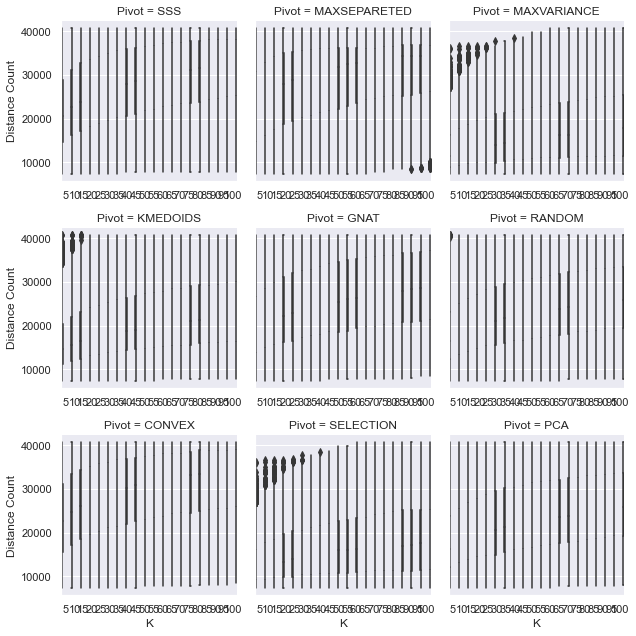

In [44]:
dt = readResults("../results/ulcer_omni_euclidean/", False)
sns.set_theme()
sns.set_palette("colorblind")
g = sns.FacetGrid(data=dt, col="Pivot", col_wrap=3)
g.map_dataframe(sns.boxplot, x="K", y="Distance Count", hue="K")

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

g.fig.tight_layout()

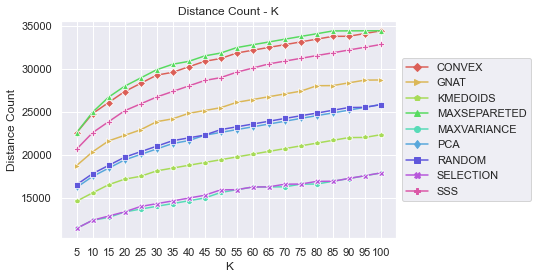

In [28]:
#Line plot
sns.set_theme()
sns.set_palette(sns.color_palette("hls", 9))
p1 = sns.lineplot(data=df_omnikdtree, x="K", y="Distance Count", hue="Pivot", style="Pivot", markers=["D",">","p","^","o","d","s","X","P"], dashes=False)
p1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1.set_xticks(range(5,101,5))
p1.set_title("Distance Count - K")
# fig = p1.get_figure()
# fig.savefig("ulcer_dist_count.svg")

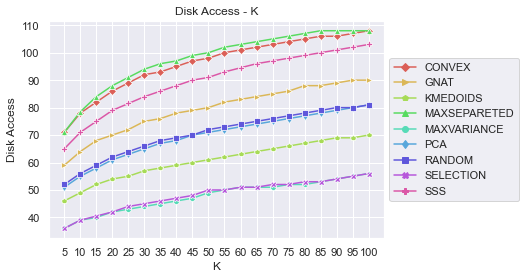

In [31]:
#Line plot
sns.set_theme()
sns.set_palette(sns.color_palette("hls", 9))
p1 = sns.lineplot(data=df_omnikdtree, x="K", y="Disk Access", hue="Pivot", style="Pivot", markers=["D",">","p","^","o","d","s","X","P"], dashes=False)
p1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1.set_xticks(range(5,101,5))
p1.set_title("Disk Access - K")
fig = p1.get_figure()
fig.savefig("ulcer_disk_access.svg")